<a href="https://colab.research.google.com/github/Abdullah-Attallah/vegetables/blob/main/fruit_and_vegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The fruit and vegetable datasets contain image data representing various types of fruits and vegetables. The goal of this analysis is to apply machine learning models to classify or predict attributes of the images effectively. This document outlines the steps taken to preprocess, analyze, and model the data.

### Import Libraries


In [ ]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
#CNN classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Access the zip file after mounting
file_path = "/content/drive/MyDrive/Colab Notebooks/Vegetables.zip"

Mounted at /content/drive


In [ ]:
import zipfile

# Extract the ZIP file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/vegetables')  # Extract to the specified folder

# Verify extraction
!ls '/content/vegetables'


test  train  validation


In [ ]:
#Load data
train_path = "/content/vegetables/train"
test_path = "/content/vegetables/test"
val_path = "/content/vegetables/validation"

In [ ]:
#Number of Categories for each folder
print("Categories in train folder:",len(os.listdir(train_path)))
print("Categories in test folder:",len(os.listdir(test_path)))
print("categories in validation folder:",len(os.listdir(val_path)))

Categories in train folder: 36
Categories in test folder: 36
categories in validation folder: 36


In [ ]:
#Categories
print(os.listdir(train_path))

['watermelon', 'lemon', 'ginger', 'soy beans', 'onion', 'garlic', 'corn', 'chilli pepper', 'capsicum', 'bell pepper', 'cucumber', 'sweetcorn', 'cabbage', 'paprika', 'apple', 'lettuce', 'pomegranate', 'turnip', 'raddish', 'jalepeno', 'carrot', 'banana', 'orange', 'peas', 'spinach', 'kiwi', 'grapes', 'beetroot', 'pineapple', 'potato', 'tomato', 'mango', 'sweetpotato', 'pear', 'eggplant', 'cauliflower']


In [ ]:
classes = [class_name for class_name in os.listdir(train_path)]
count =[]
for class_name in classes:
  count.append(len(os.listdir(os.path.join(train_path,class_name))))
print("classes",classes)
print("count",count)
print(class_name)

classes ['watermelon', 'lemon', 'ginger', 'soy beans', 'onion', 'garlic', 'corn', 'chilli pepper', 'capsicum', 'bell pepper', 'cucumber', 'sweetcorn', 'cabbage', 'paprika', 'apple', 'lettuce', 'pomegranate', 'turnip', 'raddish', 'jalepeno', 'carrot', 'banana', 'orange', 'peas', 'spinach', 'kiwi', 'grapes', 'beetroot', 'pineapple', 'potato', 'tomato', 'mango', 'sweetpotato', 'pear', 'eggplant', 'cauliflower']
count [84, 82, 68, 97, 94, 92, 87, 87, 89, 90, 94, 91, 92, 83, 68, 97, 79, 98, 81, 88, 82, 75, 69, 100, 97, 88, 100, 88, 99, 77, 92, 86, 69, 89, 84, 79]
cauliflower


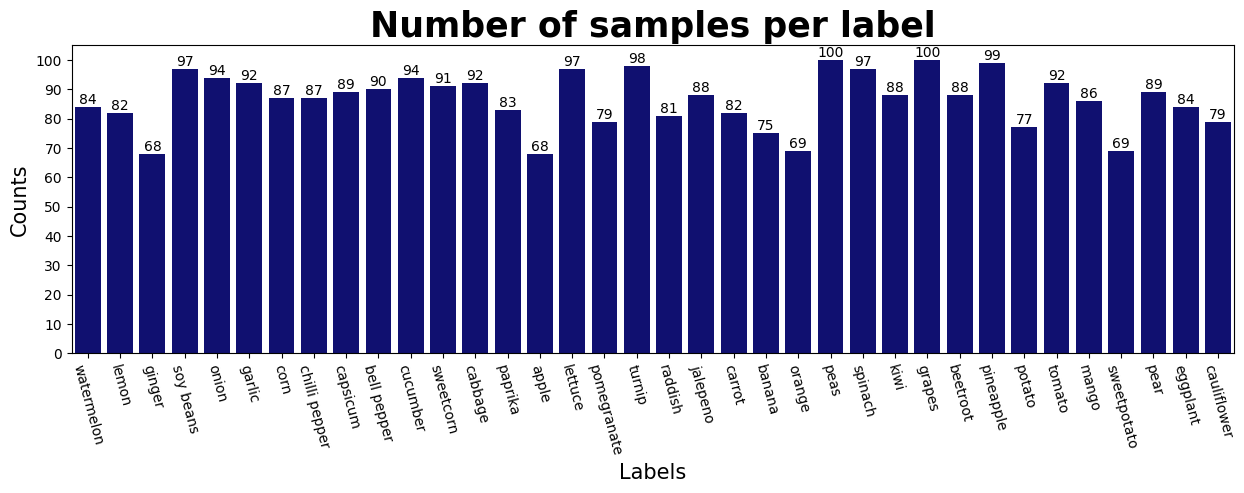

In [ ]:
# work on train folder and count number of samples per each class
classes = [class_name for class_name in os.listdir(train_path)]
count = []
for class_name in classes :
    count.append(len(os.listdir(os.path.join(train_path, class_name))))

plt.figure(figsize=(15, 4))
ax = sns.barplot(x=classes, y=count, color='navy')
plt.xticks(rotation=285)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Number of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, 105, 10))
plt.show()

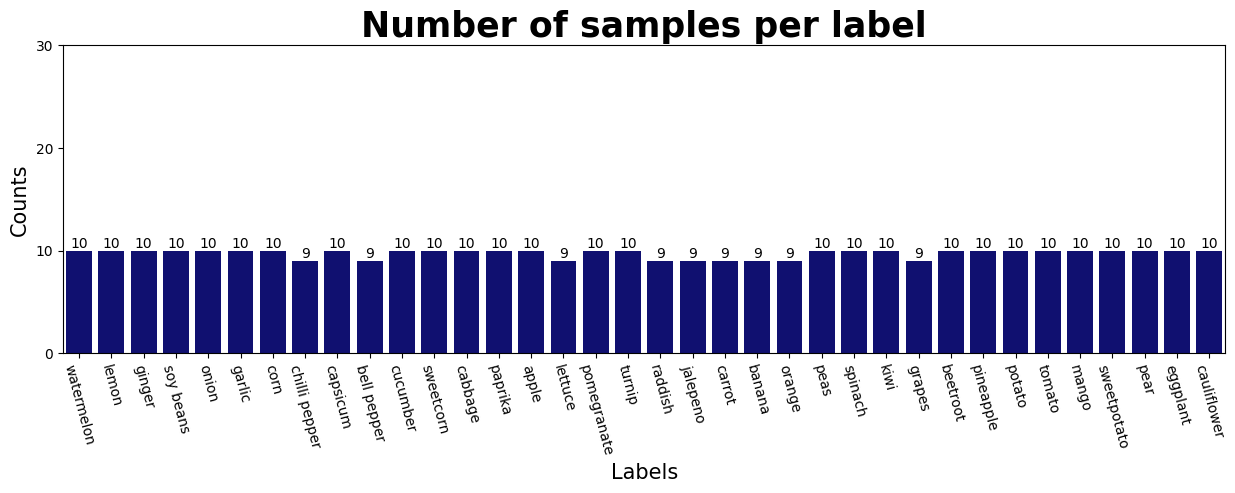

In [ ]:
# work on train folder and count number of samples per each class
classes = [class_name for class_name in os.listdir(val_path)]
count = []
for class_name in classes :
    count.append(len(os.listdir(os.path.join(val_path, class_name))))

plt.figure(figsize=(15, 4))
ax = sns.barplot(x=classes, y=count, color='navy')
plt.xticks(rotation=285)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Number of samples per label', fontsize=25, fontweight='bold')
plt.xlabel('Labels', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(np.arange(0, 35, 10))
plt.show()

### Data Augmentation

In [ ]:
#Create Image Generator
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip =True,
    fill_mode = "nearest"

)
#Create train Generator
train_generator =train_datagen.flow_from_directory(
    train_path,
    target_size = (150,150),
    batch_size = 64,
    class_mode = "categorical"
)

#Create test Generator
test_generator =train_datagen.flow_from_directory(
    test_path,
    target_size = (150,150),
    batch_size = 64,
    class_mode = "categorical"
)

#Create validation Generator
val_generator =train_datagen.flow_from_directory(
    val_path,
    target_size = (150,150),
    batch_size = 64,
    class_mode = "categorical"

)

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [ ]:
# Access a batch
images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

# Print the class indices (folder names mapped to labels)
print("Class Indices:", train_generator.class_indices)
print("class name:",class_names)

Images shape: (64, 150, 150, 3)
Labels shape: (64, 36)
Class Indices: {'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}
class name: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 

### Python Code for Displaying Images in a Grid

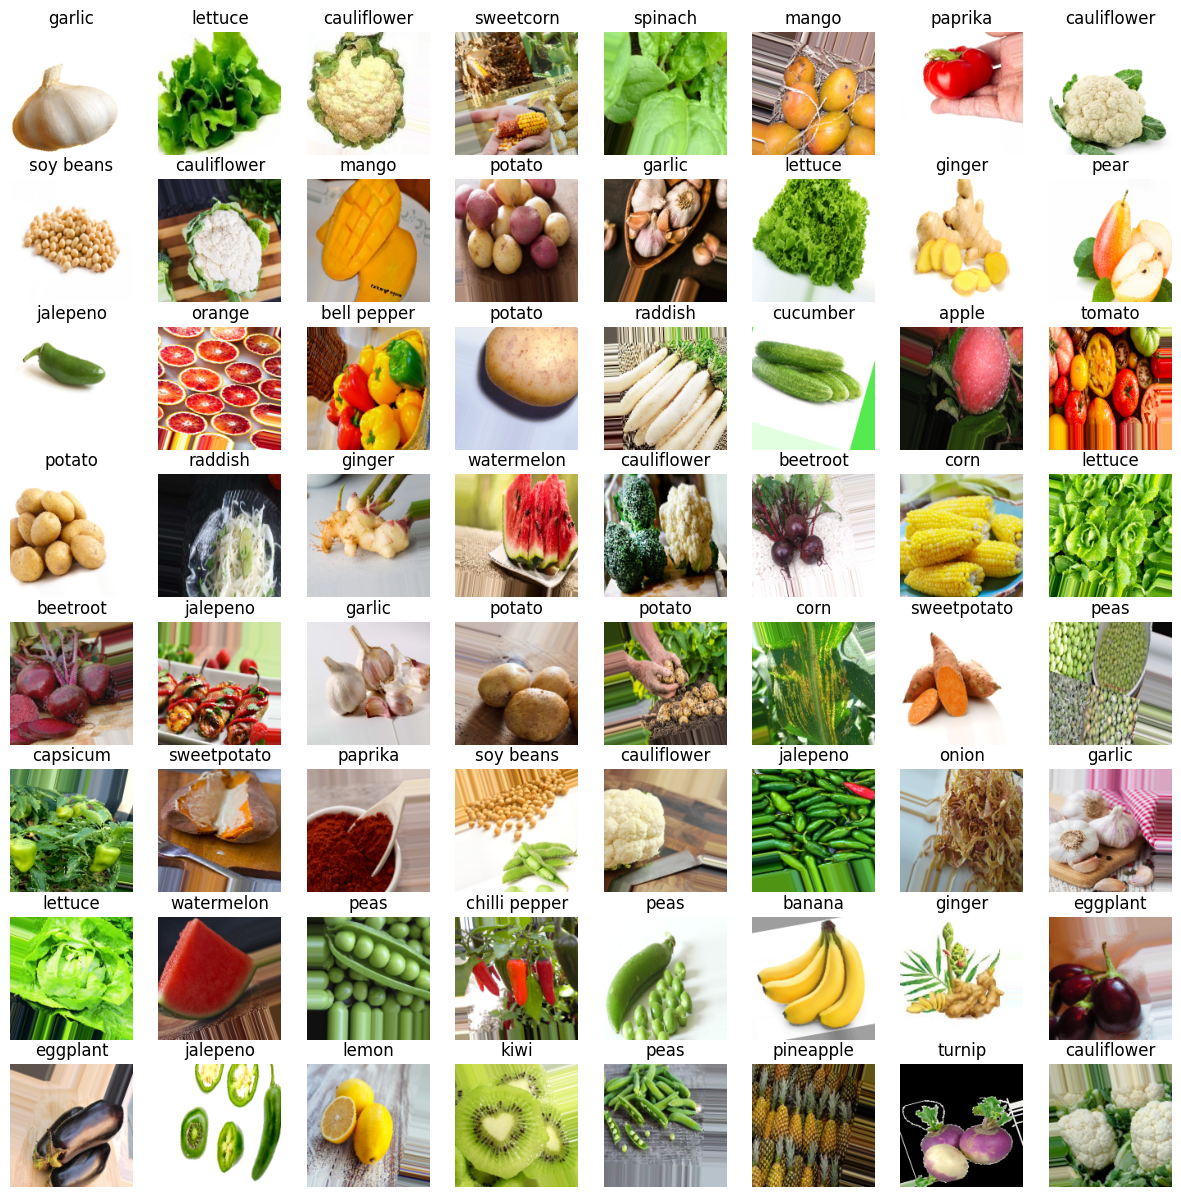

In [ ]:
# Loop through the images and display them in a grid
plt.figure(figsize = (15,15))
for i in range(len(images)):
    ax = plt.subplot(8, 8, i + 1)  # 7 rows, 6 columns grid
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])
    plt.axis("off")
plt.tight_layout
plt.show()

# Loop through the images and display them in a grid

In [ ]:
# Load InceptionV3 as the base model
base_model  = InceptionV3(input_shape = (150,150,3), include_top =False,weights = "imagenet")
base_model.trainable = True

#Define the model
model= Sequential([base_model,#inceptionV3 as the base model
                   GlobalAveragePooling2D(),#Replace Flatten Layer
                   Dense(1024,activation = "relu"),#Dense layer
                   Dropout(0.3), #for Regularization
                   Dense(len(classes),activation="softmax")#output layer
])


#compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
#Summary of the model
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 3, 3, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │          36,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,937,860 (91.32 MB)

 Trainable params: 23,903,428 (91.18 MB)

 Non-trainable params: 34,432 (134.50 KB)

### Training the Model

**The following code trains the defined deep learning model using a training and validation data generator.**

In [ ]:
#Train the model
history = model.fit(train_generator,epochs=30,validation_data=val_generator,steps_per_epoch=train_generator.samples // train_generator.batch_size,validation_steps = val_generator.samples // val_generator.batch_size)

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 903s 17s/step - accuracy: 0.1279 - loss: 3.3924 - val_accuracy: 0.5750 - val_loss: 1.4825
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.3750 - loss: 2.4962 - val_accuracy: 0.5484 - val_loss: 1.4839
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 846s 17s/step - accuracy: 0.5899 - loss: 1.6623 - val_accuracy: 0.7688 - val_loss: 0.7437
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.6094 - loss: 1.4750 - val_accuracy: 0.7097 - val_loss: 1.2218
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 828s 17s/step - accuracy: 0.7399 - loss: 0.8929 - val_accuracy: 0.8687 - val_loss: 0.4120
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7344 - loss: 1.0909 - val_accuracy: 0.9355 - val_loss: 0.3372
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 831s 17s/step - accuracy: 0.8162 - loss: 0.6525 - val_accuracy: 0.9156 - val_loss: 0.2526
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.7656 - loss: 0.6663 - val_accuracy: 0.

### Plotting Training and Validation Accuracy

In [ ]:
#plot train and validation accuracy
plt.figure(figsize=(10,8))
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Plotting Training and Validation Loss

In [ ]:
#plot training and validation loss
plt.figure(figsize=(10,8))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Visualizing Model Predictions
**The function to visualize the model's predictions on a batch of images. It displays the predicted and actual labels and highlights correct predictions in green and incorrect predictions in red.**

In [ ]:
def plot_predictions(generator,model,num_images):
  image , labels = next(generator)
  predictions = model.predict(image)
  predicted_labels = np.argmax(predictions ,axis =1)
  labels = np.argmax(labels,axis=1)
  class_name = list(generator.class_indices.keys())

  plt.figure(figsize=(15,15))
  grid_size = int(np.ceil(np.sqrt(num_images)))
  for i in range (len(image)):
    ax = plt.subplot(grid_size,grid_size,i+1)
    plt.imshow(image[i])
    if predicted_labels[i] == labels[i]:
      color= "green"
    else:
      color = "red"
    plt.title(f"Predicted: {class_name[predicted_labels[i]]}\nActual: {class_name[labels[i]]}",color=color)
    plt.axis("off")
    plt.tight_layout()
  plt.show()

plot_predictions(test_generator,model,37)